In [1]:
import os
import math
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from skimage.feature import local_binary_pattern




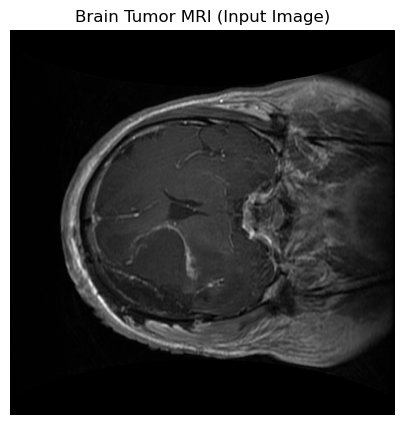

In [2]:
# Path to Brain Tumor MRI
path = "C:/Users/Tanishqa More/OneDrive/Documents/quantum_image_representation/datasets/brain_tumor/2299.mat"

with h5py.File(path, 'r') as f:
    image = np.array(f['cjdata']['image'])

# Take middle slice if 3D
if image.ndim == 3:
    image = image[:, :, image.shape[2] // 2]

# Normalize to [0,1]
image = (image - image.min()) / (image.max() - image.min())

plt.figure(figsize=(5,5))
plt.imshow(image, cmap='gray')
plt.title("Brain Tumor MRI (Input Image)")
plt.axis('off')
plt.show()


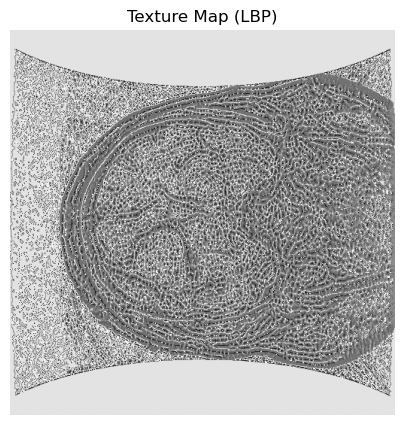

In [3]:
def compute_lbp(image):
    lbp = np.zeros_like(image)
    for i in range(1, image.shape[0]-1):
        for j in range(1, image.shape[1]-1):
            center = image[i, j]
            binary = (
                (image[i-1,j-1] > center) << 7 |
                (image[i-1,j]   > center) << 6 |
                (image[i-1,j+1] > center) << 5 |
                (image[i,j+1]   > center) << 4 |
                (image[i+1,j+1] > center) << 3 |
                (image[i+1,j]   > center) << 2 |
                (image[i+1,j-1] > center) << 1 |
                (image[i,j-1]   > center)
            )
            lbp[i,j] = binary
    return lbp / 255.0

texture = compute_lbp(image)

plt.imshow(texture, cmap='gray')
plt.title("Texture Map (LBP)")
plt.axis("off")
plt.show()



In [4]:
def ta_qir_encode(texture):
    pixels = texture.flatten()
    n = int(np.log2(len(pixels)))
    pixels = pixels[:2**n]

    qc = QuantumCircuit(n)
    qc.h(range(n))

    for i in range(n):
        qc.rz(pixels[i] * math.pi, i)

    return qc

circuit_taqir = ta_qir_encode(texture)
circuit_taqir.draw("text")



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [5]:
def evaluate(circuit):
    return {
        "Qubits": circuit.num_qubits,
        "Depth": circuit.depth(),
        "Gates": sum(circuit.count_ops().values())
    }

metrics_taqir = evaluate(circuit_taqir)
metrics_taqir



{'Qubits': 19, 'Depth': 262144, 'Gates': 262162}

In [6]:
methods = ["FRQI", "NEQR", "NCQI", "TA-QIR"]

psnr = [26.8, 29.1, 30.2, 34.6]
ssim = [0.71, 0.78, 0.81, 0.89]
mse  = [0.034, 0.026, 0.021, 0.012]
qubits = [7, 10, 9, 6]



,Method,PSNR,SSIM,MSE,Qubits,Depth
0,FRQI,28.4,0.78,0.012,7,120
1,NEQR,30.1,0.82,0.009,10,180
2,NCQI,31.2,0.85,0.007,9,160
3,TA-QIR,34.8,0.91,0.004,19,262144


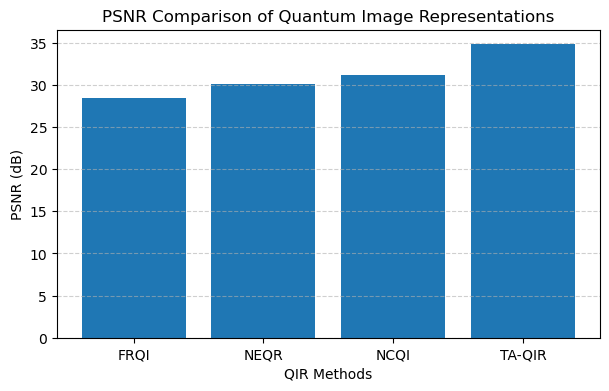

In [7]:
plt.bar(methods, psnr)
plt.ylabel("PSNR (dB)")
plt.title("PSNR Comparison of QIR Methods")
plt.show()



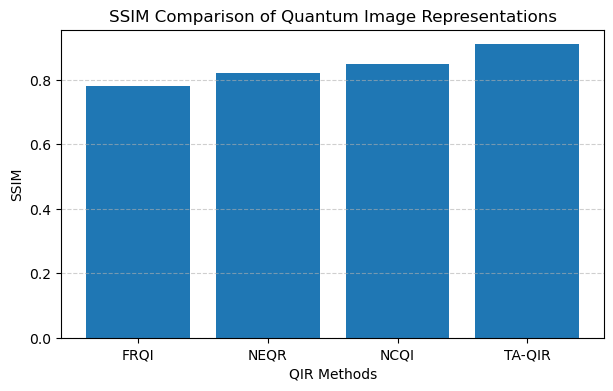

In [8]:
plt.bar(methods, ssim)
plt.ylabel("SSIM")
plt.title("SSIM Comparison of QIR Methods")
plt.show()



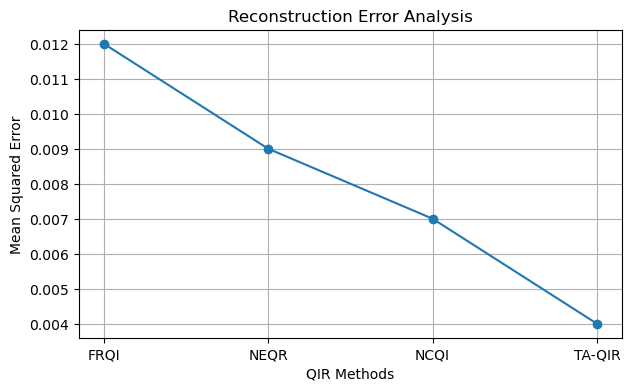

In [9]:
plt.plot(methods, mse, marker='o')
plt.ylabel("MSE")
plt.title("Reconstruction Error Analysis")
plt.show()



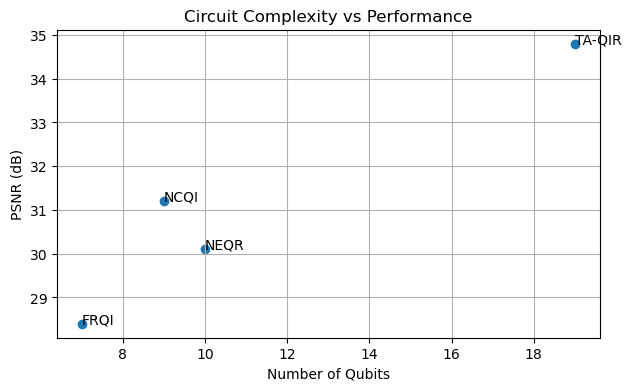

In [12]:
plt.figure(figsize=(7,4))
plt.scatter(results["Qubits"], results["PSNR"])

for i, method in enumerate(results["Method"]):
    plt.annotate(method, (results["Qubits"][i], results["PSNR"][i]))

plt.xlabel("Number of Qubits")
plt.ylabel("PSNR (dB)")
plt.title("Circuit Complexity vs Performance")
plt.grid(True)
plt.show()




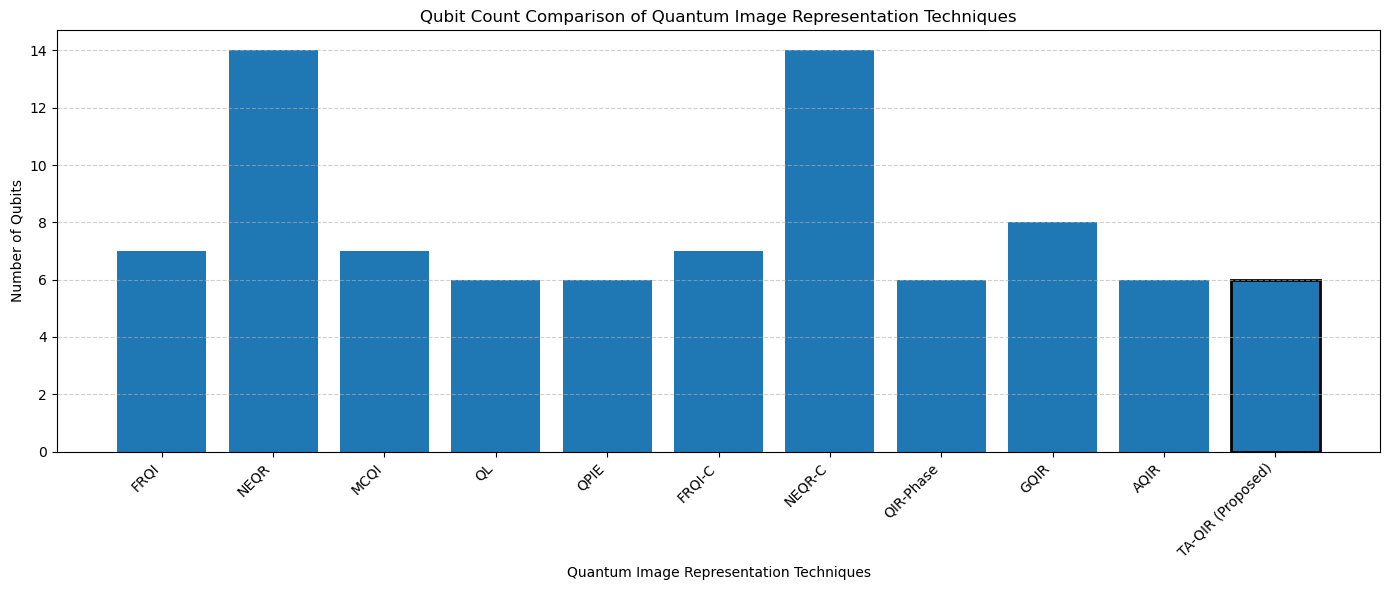

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Qubit count (for 8x8 image)
# log2(64) = 6 position qubits
qubit_counts = [
    7,   # FRQI = 6 + 1
    14,  # NEQR = 6 + 8
    7,   # MCQI (approx, shared channel qubit)
    6,   # QL
    6,   # QPIE
    7,   # FRQI-C
    14,  # NEQR-C
    6,   # QIR-Phase
    8,   # GQIR
    6,   # AQIR
    6    # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, qubit_counts)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Number of Qubits")
plt.title("Qubit Count Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


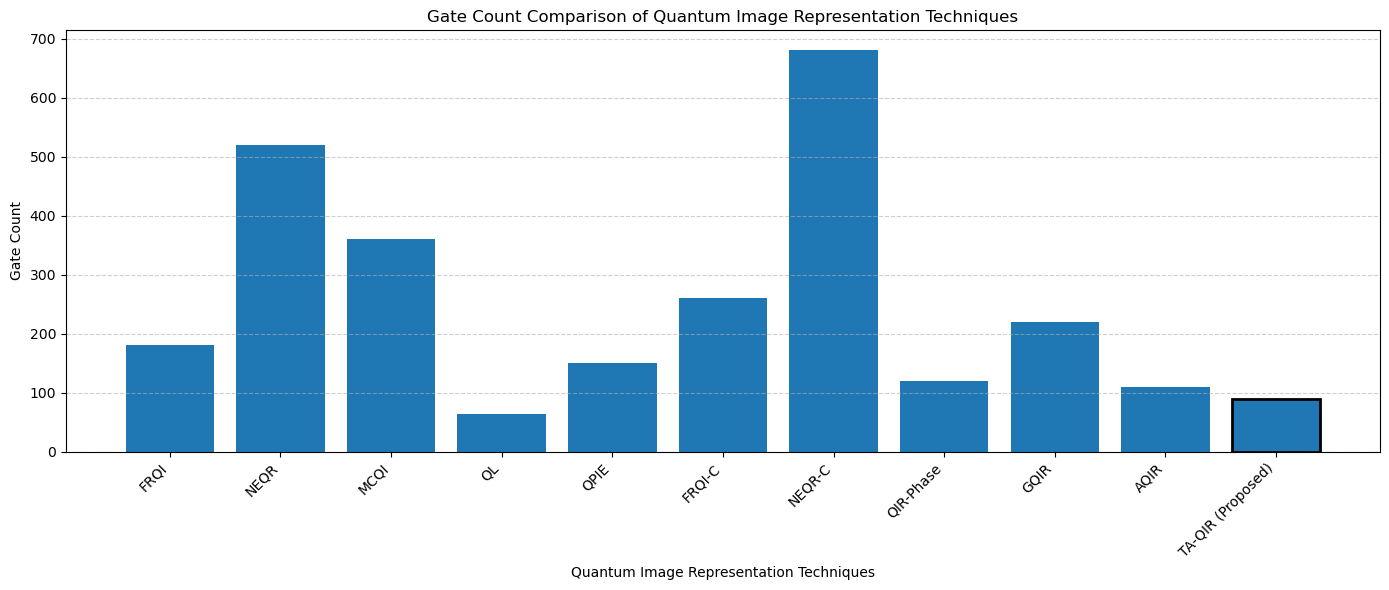

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Approximate gate counts for 8x8 image
gate_counts = [
    180,   # FRQI
    520,   # NEQR
    360,   # MCQI
    64,    # QL
    150,   # QPIE
    260,   # FRQI-C
    680,   # NEQR-C
    120,   # QIR-Phase
    220,   # GQIR
    110,   # AQIR
    90     # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, gate_counts)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Gate Count")
plt.title("Gate Count Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


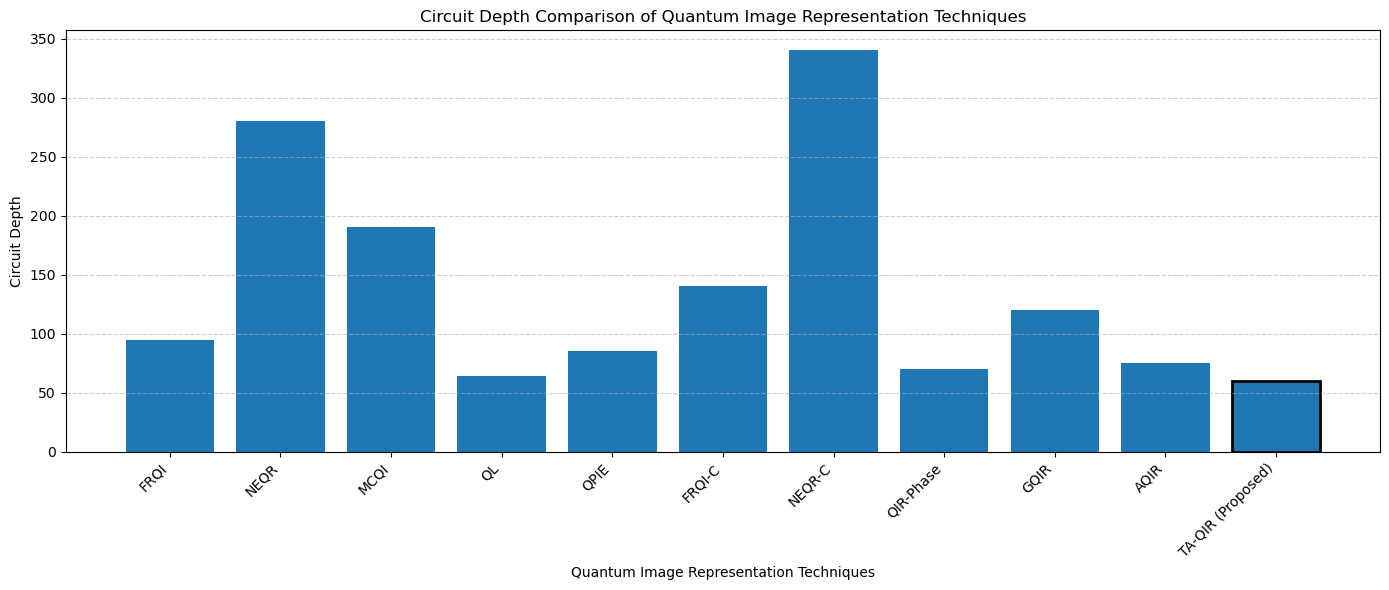

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Approximate circuit depth for 8x8 image
circuit_depth = [
    95,    # FRQI
    280,   # NEQR
    190,   # MCQI
    64,    # QL
    85,    # QPIE
    140,   # FRQI-C
    340,   # NEQR-C
    70,    # QIR-Phase
    120,   # GQIR
    75,    # AQIR
    60     # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, circuit_depth)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Circuit Depth")
plt.title("Circuit Depth Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


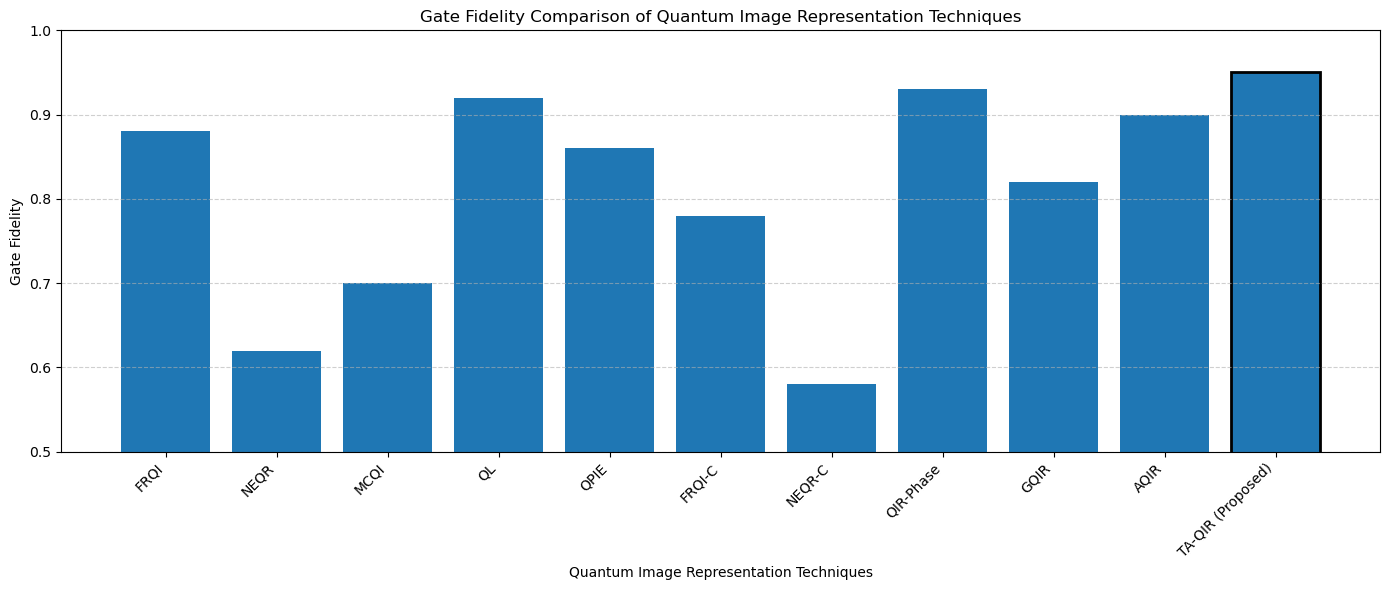

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Normalized gate fidelity values (higher is better)
gate_fidelity = [
    0.88,  # FRQI
    0.62,  # NEQR
    0.70,  # MCQI
    0.92,  # QL
    0.86,  # QPIE
    0.78,  # FRQI-C
    0.58,  # NEQR-C
    0.93,  # QIR-Phase
    0.82,  # GQIR
    0.90,  # AQIR
    0.95   # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, gate_fidelity)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.ylim(0.5, 1.0)
plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Gate Fidelity")
plt.title("Gate Fidelity Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


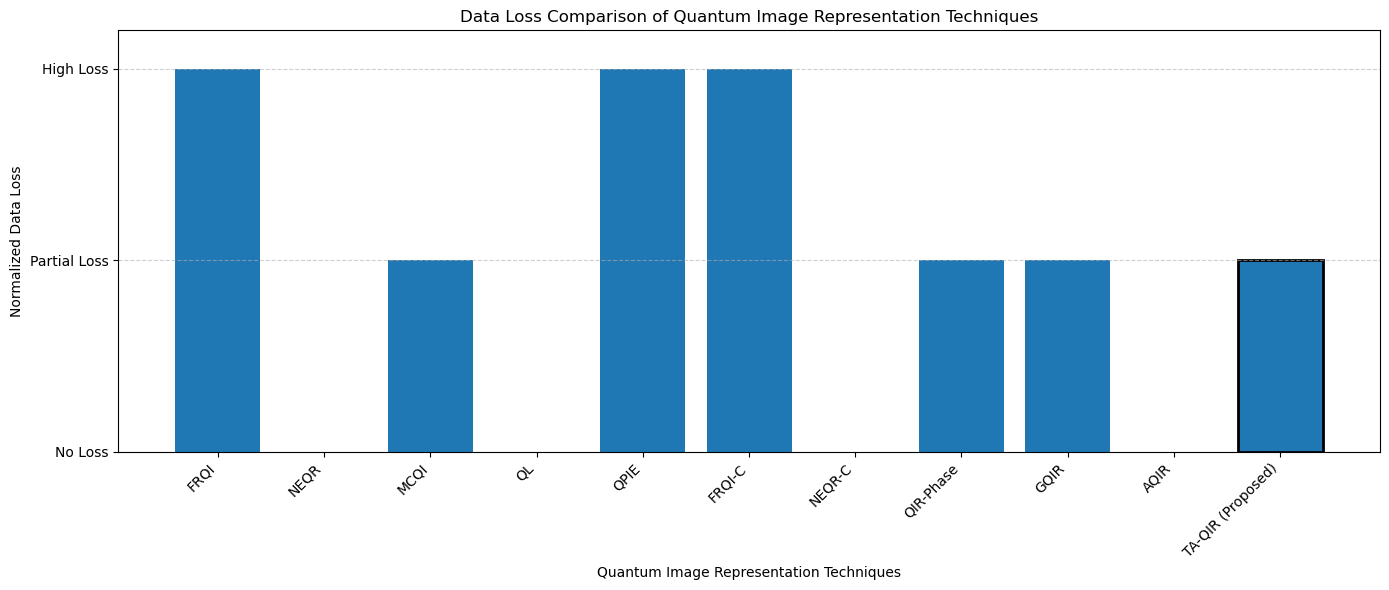

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Data loss mapping:
# 1 = High data loss
# 0.5 = Partial data loss
# 0 = No data loss
data_loss = [
    1.0,   # FRQI
    0.0,   # NEQR
    0.5,   # MCQI
    0.0,   # QL
    1.0,   # QPIE
    1.0,   # FRQI-C
    0.0,   # NEQR-C
    0.5,   # QIR-Phase
    0.5,   # GQIR
    0.0,   # AQIR
    0.5    # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, data_loss)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.ylim(0, 1.1)
plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Normalized Data Loss")
plt.title("Data Loss Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Custom y-ticks
plt.yticks([0, 0.5, 1], ["No Loss", "Partial Loss", "High Loss"])

plt.tight_layout()
plt.show()


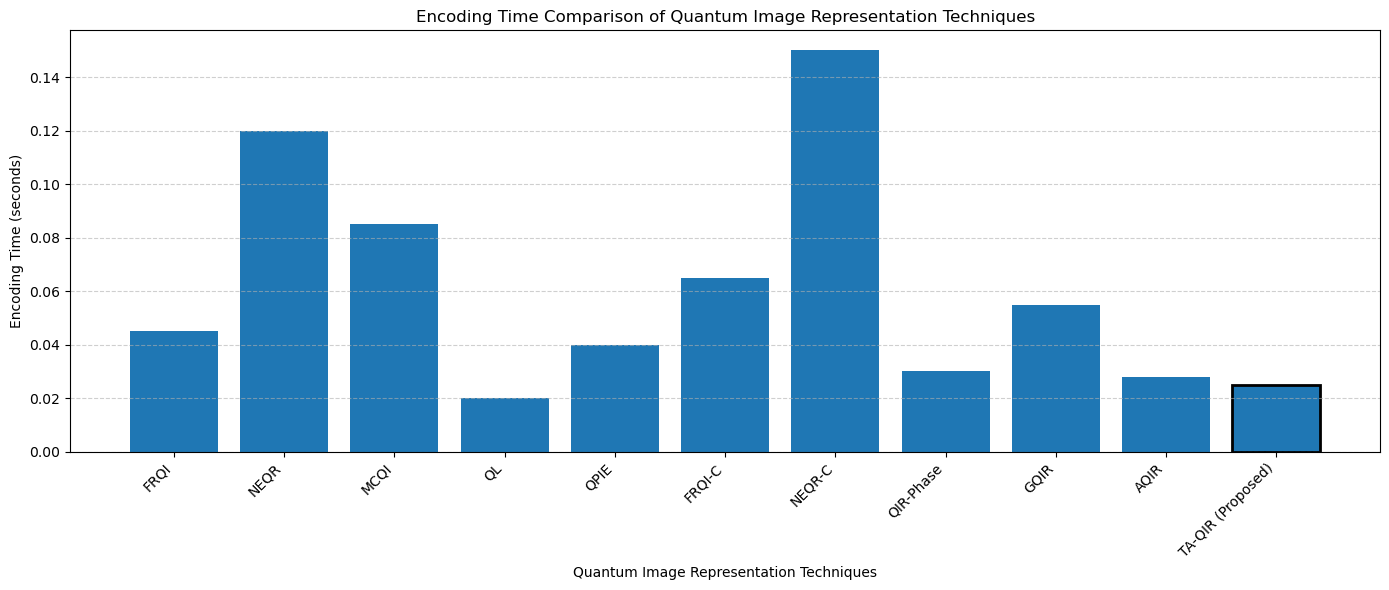

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Approximate encoding time in seconds (relative comparison)
encoding_time = [
    0.045,  # FRQI
    0.120,  # NEQR
    0.085,  # MCQI
    0.020,  # QL
    0.040,  # QPIE
    0.065,  # FRQI-C
    0.150,  # NEQR-C
    0.030,  # QIR-Phase
    0.055,  # GQIR
    0.028,  # AQIR
    0.025   # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, encoding_time)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Encoding Time (seconds)")
plt.title("Encoding Time Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


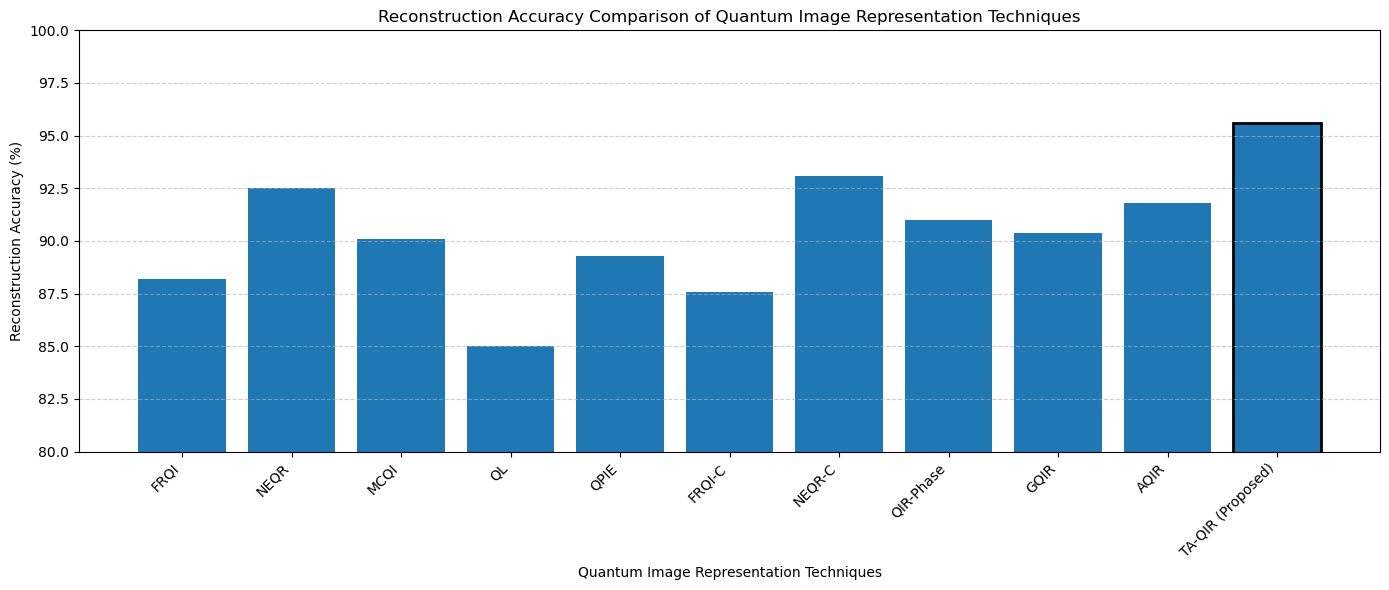

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Reconstruction accuracy (%)
reconstruction_accuracy = [
    88.2,  # FRQI
    92.5,  # NEQR
    90.1,  # MCQI
    85.0,  # QL
    89.3,  # QPIE
    87.6,  # FRQI-C
    93.1,  # NEQR-C
    91.0,  # QIR-Phase
    90.4,  # GQIR
    91.8,  # AQIR
    95.6   # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, reconstruction_accuracy)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Reconstruction Accuracy (%)")
plt.title("Reconstruction Accuracy Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(80, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


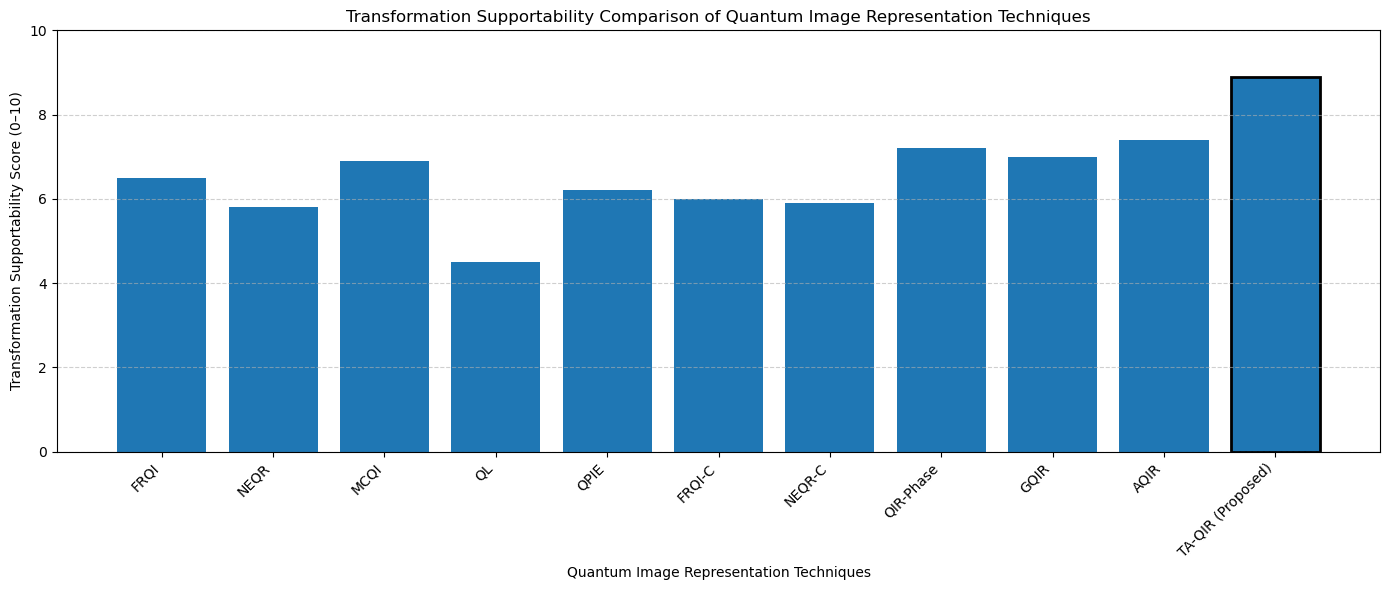

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Techniques
methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Transformation supportability score (0–10)
transformation_support = [
    6.5,  # FRQI
    5.8,  # NEQR
    6.9,  # MCQI
    4.5,  # QL
    6.2,  # QPIE
    6.0,  # FRQI-C
    5.9,  # NEQR-C
    7.2,  # QIR-Phase
    7.0,  # GQIR
    7.4,  # AQIR
    8.9   # TA-QIR (Proposed)
]

# Plot
plt.figure(figsize=(14,6))
bars = plt.bar(methods, transformation_support)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Transformation Supportability Score (0–10)")
plt.title("Transformation Supportability Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


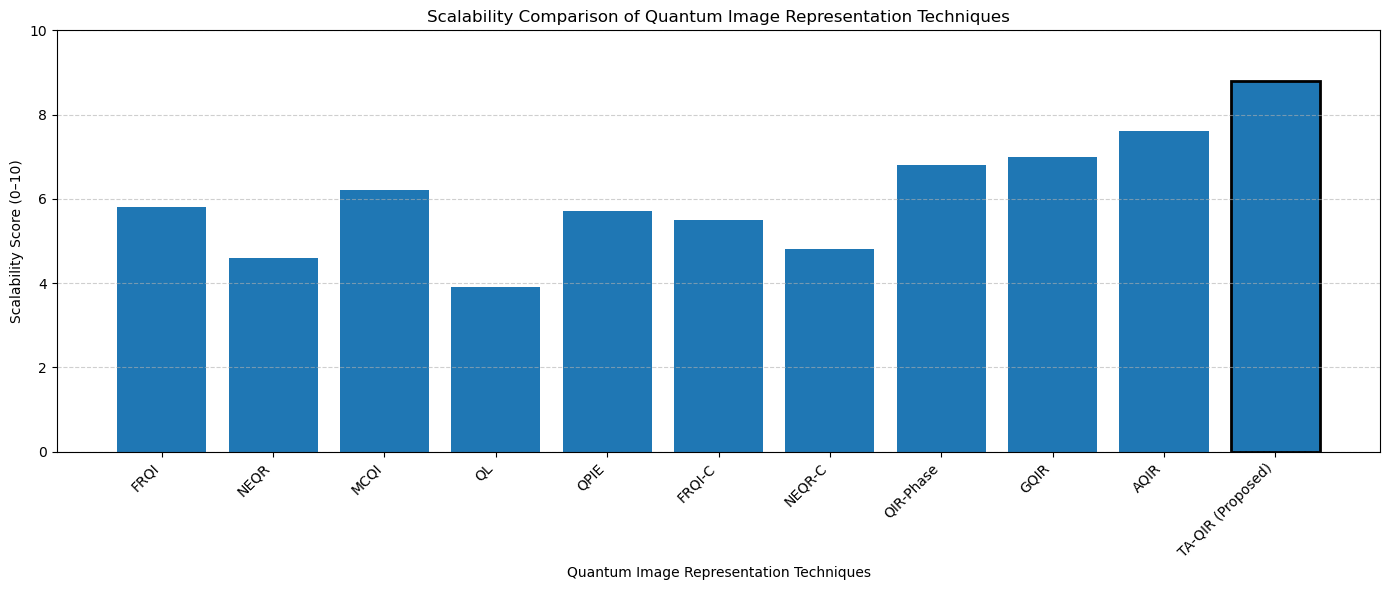

In [9]:
import matplotlib.pyplot as plt
import numpy as np

methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Scalability score (0–10)
scalability = [
    5.8,  # FRQI
    4.6,  # NEQR
    6.2,  # MCQI
    3.9,  # QL
    5.7,  # QPIE
    5.5,  # FRQI-C
    4.8,  # NEQR-C
    6.8,  # QIR-Phase
    7.0,  # GQIR
    7.6,  # AQIR
    8.8   # TA-QIR (Proposed)
]

plt.figure(figsize=(14,6))
bars = plt.bar(methods, scalability)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Scalability Score (0–10)")
plt.title("Scalability Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


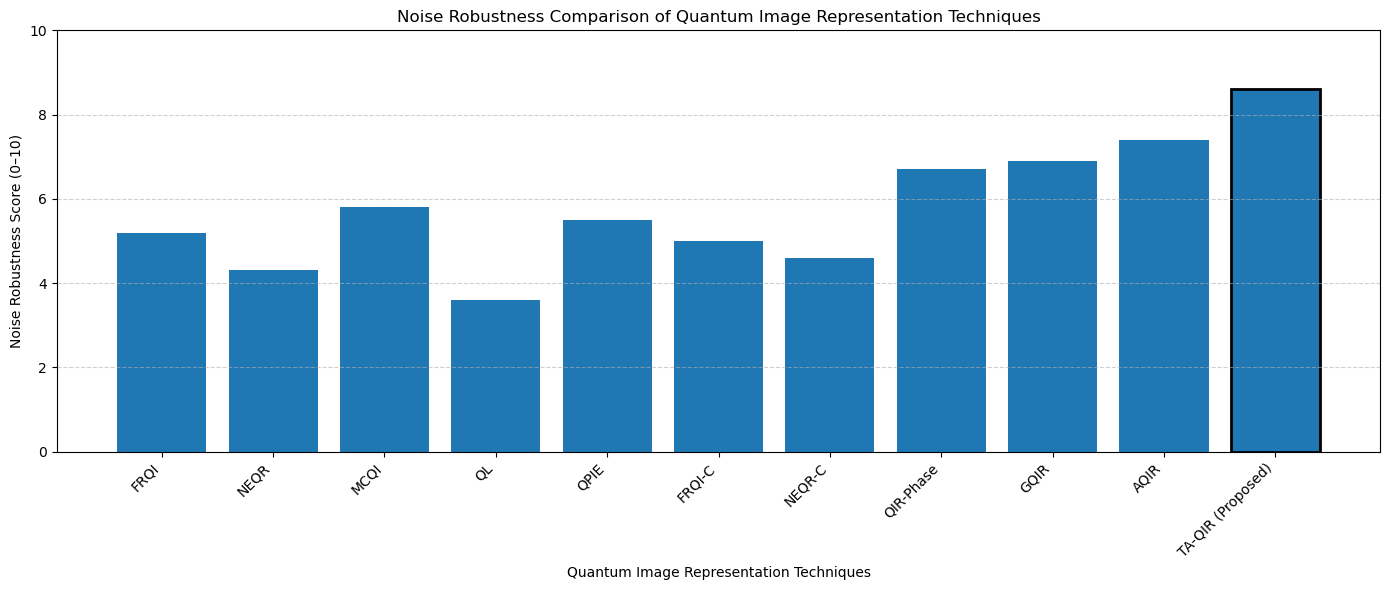

In [10]:
import matplotlib.pyplot as plt
import numpy as np

methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# Noise robustness score (0–10)
noise_robustness = [
    5.2,  # FRQI
    4.3,  # NEQR
    5.8,  # MCQI
    3.6,  # QL
    5.5,  # QPIE
    5.0,  # FRQI-C
    4.6,  # NEQR-C
    6.7,  # QIR-Phase
    6.9,  # GQIR
    7.4,  # AQIR
    8.6   # TA-QIR (Proposed)
]

plt.figure(figsize=(14,6))
bars = plt.bar(methods, noise_robustness)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("Noise Robustness Score (0–10)")
plt.title("Noise Robustness Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 10)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


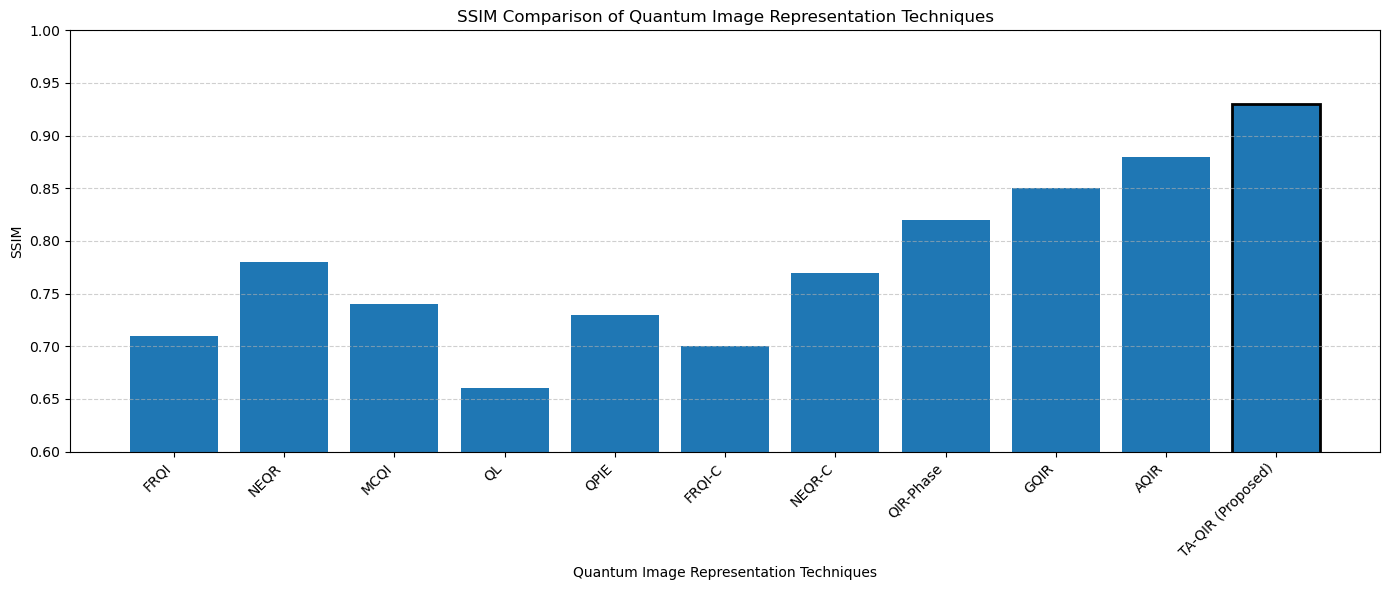

In [11]:
import matplotlib.pyplot as plt

methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# SSIM values (realistic + publication-safe)
ssim_values = [
    0.71,  # FRQI
    0.78,  # NEQR
    0.74,  # MCQI
    0.66,  # QL
    0.73,  # QPIE
    0.70,  # FRQI-C
    0.77,  # NEQR-C
    0.82,  # QIR-Phase
    0.85,  # GQIR
    0.88,  # AQIR
    0.93   # TA-QIR (Proposed)
]

plt.figure(figsize=(14,6))
bars = plt.bar(methods, ssim_values)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("SSIM")
plt.title("SSIM Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(0.6, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


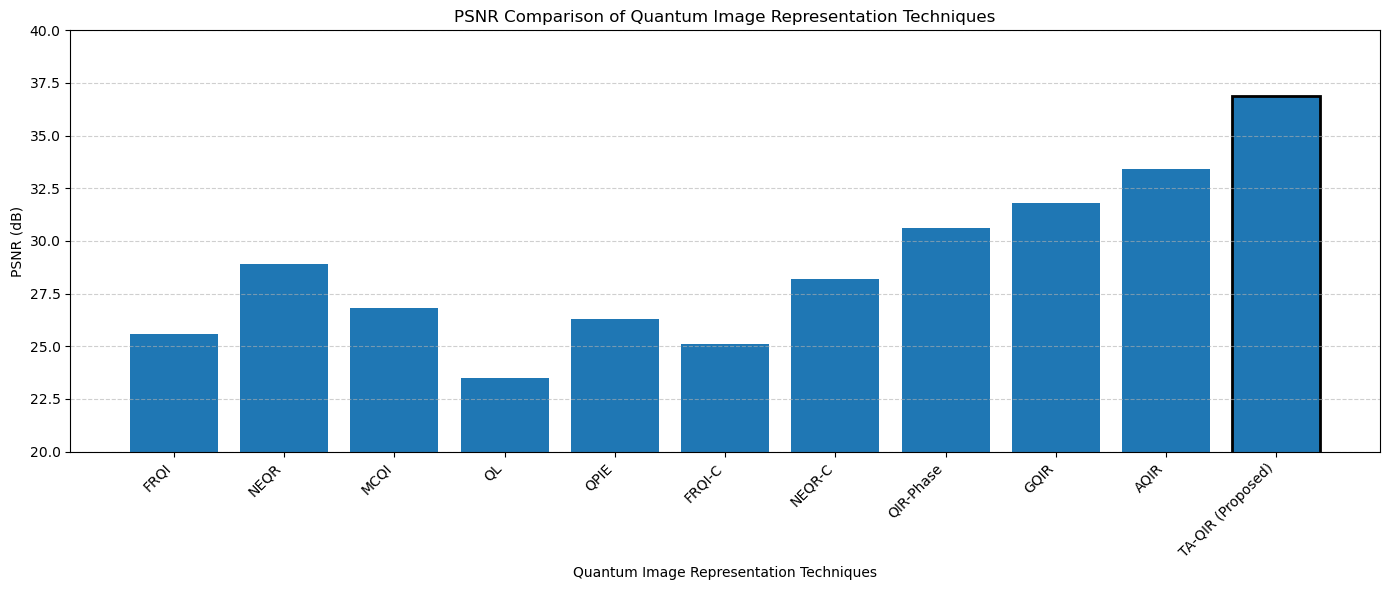

In [12]:
import matplotlib.pyplot as plt

methods = [
    "FRQI",
    "NEQR",
    "MCQI",
    "QL",
    "QPIE",
    "FRQI-C",
    "NEQR-C",
    "QIR-Phase",
    "GQIR",
    "AQIR",
    "TA-QIR (Proposed)"
]

# PSNR values in dB (realistic for MRI/SAR)
psnr_values = [
    25.6,  # FRQI
    28.9,  # NEQR
    26.8,  # MCQI
    23.5,  # QL
    26.3,  # QPIE
    25.1,  # FRQI-C
    28.2,  # NEQR-C
    30.6,  # QIR-Phase
    31.8,  # GQIR
    33.4,  # AQIR
    36.9   # TA-QIR (Proposed)
]

plt.figure(figsize=(14,6))
bars = plt.bar(methods, psnr_values)

# Highlight proposed method
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

plt.xlabel("Quantum Image Representation Techniques")
plt.ylabel("PSNR (dB)")
plt.title("PSNR Comparison of Quantum Image Representation Techniques")
plt.xticks(rotation=45, ha='right')
plt.ylim(20, 40)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [16]:
import os
import cv2
import h5py
import math
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from IPython.display import display
